# PCA on log returns
Apply PCA on log returns of stocks and use pyfolio for analysis

In [1]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

data = yf.download("GOOGL AAPL AMD TSLA NFLX TXN AMAT AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T", start="2011-05-20", end="2021-05-20")
tech = data[["Adj Close","Volume"]]
data = yf.download("BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS", start="2011-05-20", end="2021-05-20")
fin = data[["Adj Close","Volume"]]

[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed


In [2]:
#returns
#returns tech
rs_tech = tech["Adj Close"].apply(np.log).diff(1) 
# rs_tech.plot(title='Daily Returns of the Stocks in the tech companies')

#returns fin
rs_fin = fin["Adj Close"].apply(np.log).diff(1) 
# rs_fin.plot(title='Daily Returns of the Stocks in the finance companies')

In [3]:
train_tech, test_tech = train_test_split(rs_tech, test_size=0.2, random_state=42, shuffle=False)
train_fin, test_fin = train_test_split(rs_fin, test_size=0.2, random_state=42, shuffle=False)

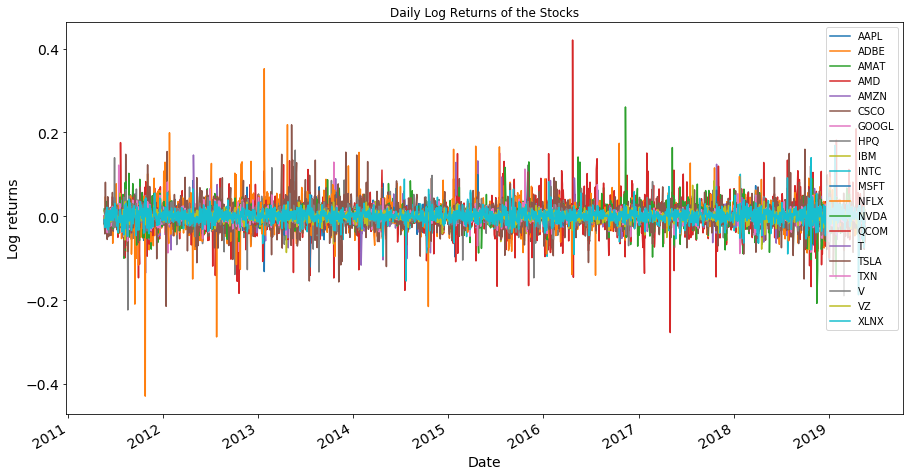

In [4]:
fig, axes = plt.subplots(1)
train_tech.plot(ax=axes, title='Daily Log Returns of the Stocks',fontsize=14)
# axes.legend([])
axes.set_ylabel('Log returns', fontsize=14)
axes.set_xlabel('Date', fontsize=14)
fig.set_size_inches(15, 8) 

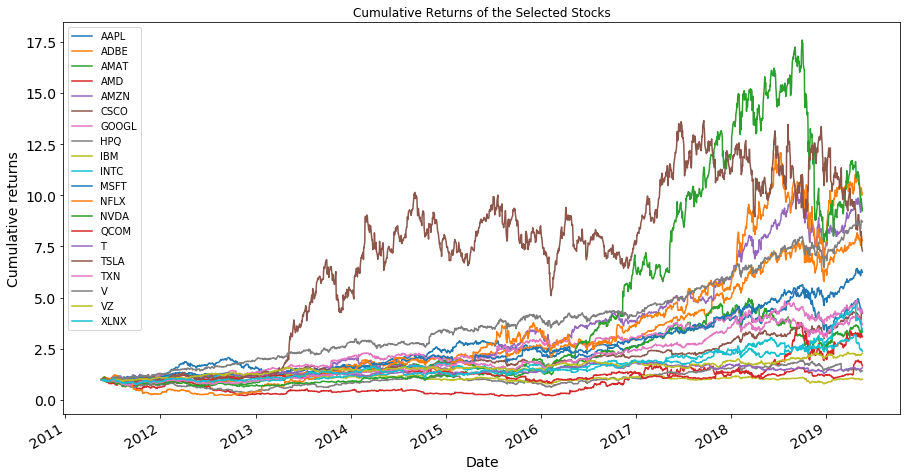

In [5]:
fig, axes = plt.subplots(1)
crs = train_tech.cumsum().apply(np.exp)
crs.plot(ax=axes, title='Cumulative Returns of the Selected Stocks')
axes.set_ylabel('Cumulative returns',fontsize=14)
axes.set_xlabel('Date', fontsize=14)
axes.tick_params(axis='x',labelsize=14)
axes.tick_params(axis='y',labelsize=14)
# axes.legend([])
fig.set_size_inches(15, 8) 

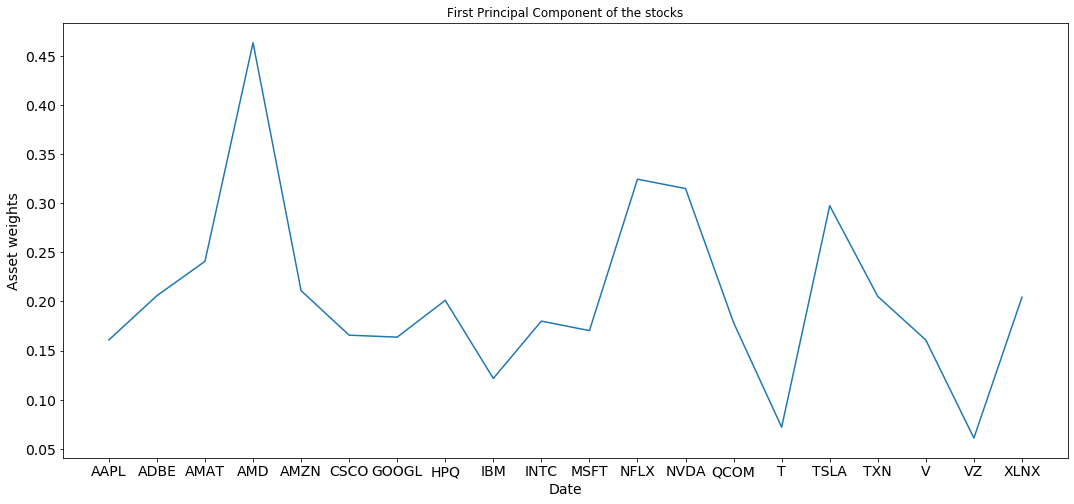

In [6]:
from sklearn.decomposition import PCA
pca_tech = PCA(1).fit(train_tech.fillna(0))
pca_fin = PCA(1).fit(train_fin.fillna(0))

fig, axes = plt.subplots(1)
#tech
pc1_tech = pd.Series(index=train_tech.columns, data=pca_tech.components_[0])
pc1_tech.plot(ax=axes, xticks=np.arange(0, 20, 1.0),  title='First Principal Component of the stocks',fontsize=14)
axes.set_ylabel('Asset weights', fontsize=14)
axes.set_xlabel('Date', fontsize=14)


# #fin
# pc1_fin = pd.Series(index=train_fin.columns, data=pca_fin.components_[0])
# pc1_fin.plot(ax=axes[1], xticks=np.arange(0, 20, 1.0),  title='First Principal Component of the finance sector')

fig.set_size_inches(18, 8) 

In [7]:
pc1_tech.sort_values()

VZ       0.061001
T        0.072055
IBM      0.121695
V        0.160783
AAPL     0.160827
GOOGL    0.163715
CSCO     0.165702
MSFT     0.170346
QCOM     0.178417
INTC     0.180030
HPQ      0.201157
XLNX     0.204297
TXN      0.205192
ADBE     0.205924
AMZN     0.211052
AMAT     0.240853
TSLA     0.297498
NVDA     0.314956
NFLX     0.324499
AMD      0.463438
dtype: float64

Text(0.5, 1.0, 'Top 10 assets')

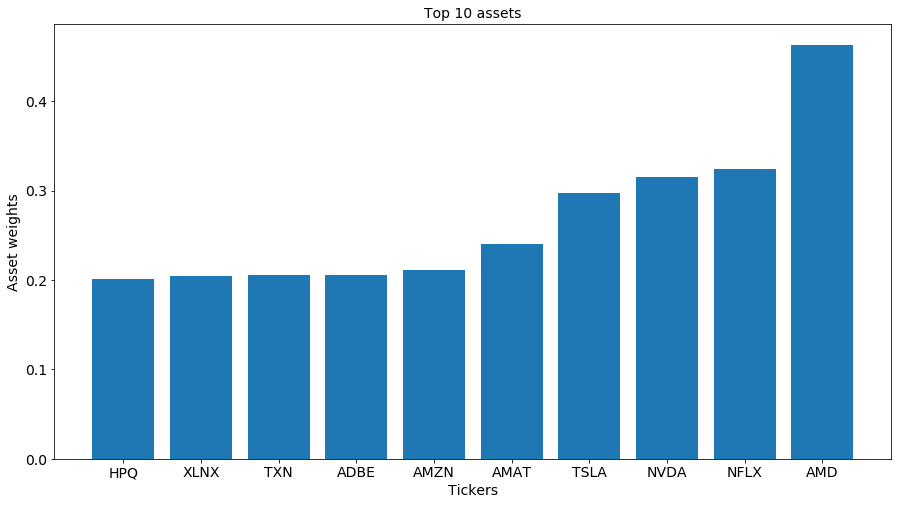

In [25]:
from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(15, 8))
plt.bar(pc1_tech.sort_values().index[-10:],pc1_tech.sort_values().values[-10:])
plt.ylabel('Asset weights', fontsize=14)
plt.xlabel('Tickers', fontsize=14)
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.title("Top 10 assets",fontsize=14)

In [8]:
# pc1_fin.sort_values()

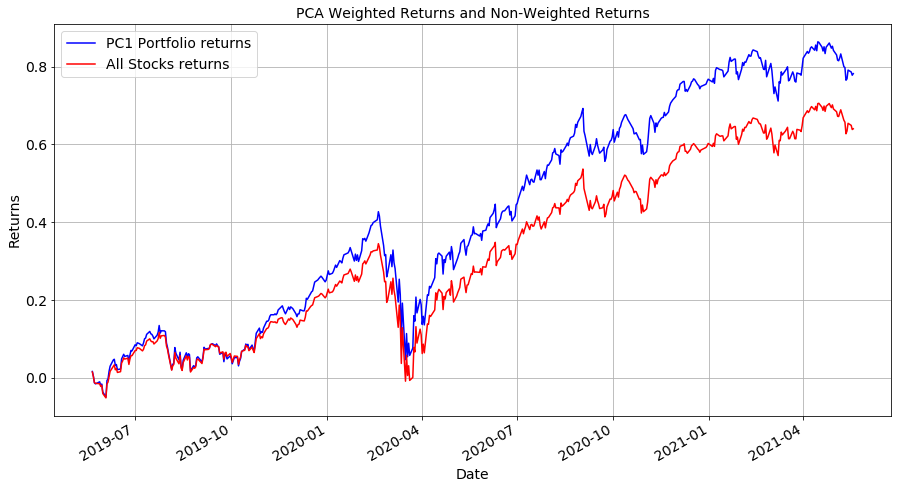

In [9]:
tech_nw = test_tech.mean(1)
fin_nw = test_fin.mean(1)

eigvals_tech, eigvecs_tech = np.linalg.eigh(train_tech.astype(float).cov())
eigvals_fin, eigvecs_fin = np.linalg.eigh(train_fin.astype(float).cov())

pcw_tech = eigvecs_tech[:,-1]
pcw_tech = pcw_tech/sum(pcw_tech)
pcw_fin = eigvecs_fin[:,-1]
pcw_fin = pcw_fin/sum(pcw_fin)

fig, ax = plt.subplots(1, figsize=(15, 8)) 
test_tech.dot(pcw_tech).cumsum().plot(ax=ax, style='b-',fontsize=14)
tech_nw.cumsum().plot(ax=ax, style='r-',fontsize=14)
ax.legend(['PC1 Portfolio returns','All Stocks returns'],fontsize=14)
ax.set_title("PCA Weighted Returns and Non-Weighted Returns",fontsize=14)
ax.set_ylabel('Returns', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.grid()
# test_fin.dot(pcw_fin).cumsum().plot(ax=ax[1], style='b-')
# fin_nw.cumsum().plot(ax=ax[1], style='r-')
# ax[1].legend(['PC1 Portfolio returns','Finance Stocks returns'])
# ax[1].grid()
# fig.suptitle('PCA Return Reconstruction')

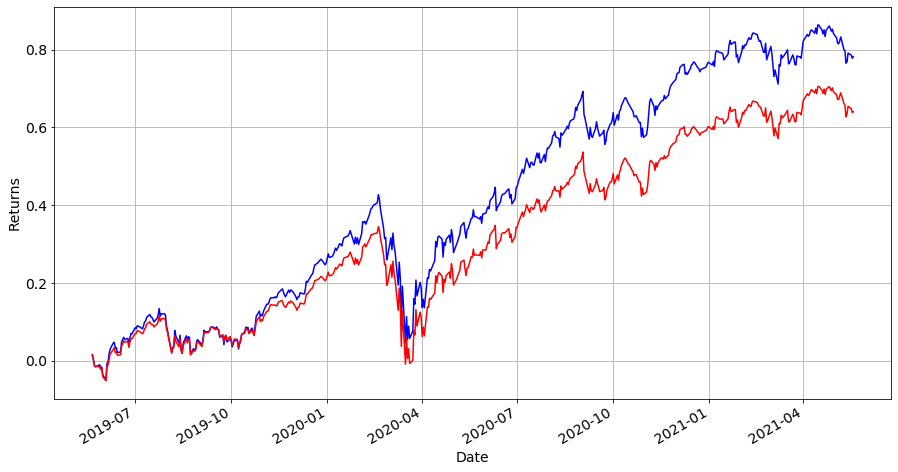

In [10]:
fig, ax = plt.subplots(1, figsize=(15, 8)) 
test_tech.dot(abs(pc1_tech)/sum(abs(pc1_tech))).cumsum().plot(ax=ax, style='b-',fontsize=14)
tech_nw.cumsum().plot(ax=ax, style='r-',fontsize=14)
ax.set_ylabel('Returns', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
plt.grid()

In [11]:
pcw_tech

array([0.03919319, 0.05018323, 0.05869553, 0.11293914, 0.05143295,
       0.04038132, 0.03989713, 0.04902156, 0.02965681, 0.04387307,
       0.04151294, 0.07907984, 0.07675425, 0.04347989, 0.01755964,
       0.07249962, 0.0500049 , 0.03918244, 0.01486572, 0.04978684])

In [12]:
test_tech.dot(pcw_tech)

Date
2019-05-21    0.015889
2019-05-22   -0.012383
2019-05-23   -0.017051
2019-05-24   -0.002353
2019-05-28    0.005259
                ...   
2021-05-13    0.003587
2021-05-14    0.022452
2021-05-17   -0.004770
2021-05-18   -0.008438
2021-05-19    0.004071
Length: 504, dtype: float64

In [13]:
test_tech.transpose().mean()

Date
2019-05-21    0.014490
2019-05-22   -0.012350
2019-05-23   -0.015088
2019-05-24   -0.001432
2019-05-28   -0.001323
                ...   
2021-05-13    0.007187
2021-05-14    0.019782
2021-05-17   -0.005313
2021-05-18   -0.010765
2021-05-19    0.001887
Length: 504, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


Weighted returns PCA


Start date,2019-05-21
End date,2021-05-19
Total months,24
,Backtest
Annual return,39.698%
Cumulative returns,95.156%
Annual volatility,33.344%
Sharpe ratio,1.17
Calmar ratio,1.17
Stability,0.92
Max drawdown,-34.044%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.04,2020-02-19,2020-03-16,2020-07-06,99
1,13.17,2020-09-02,2020-09-23,2020-11-25,61
2,12.67,2021-02-12,2021-03-08,2021-04-09,41
3,11.46,2019-07-24,2019-08-23,2019-11-04,74
4,9.58,2021-04-15,2021-05-12,NaT,NaN


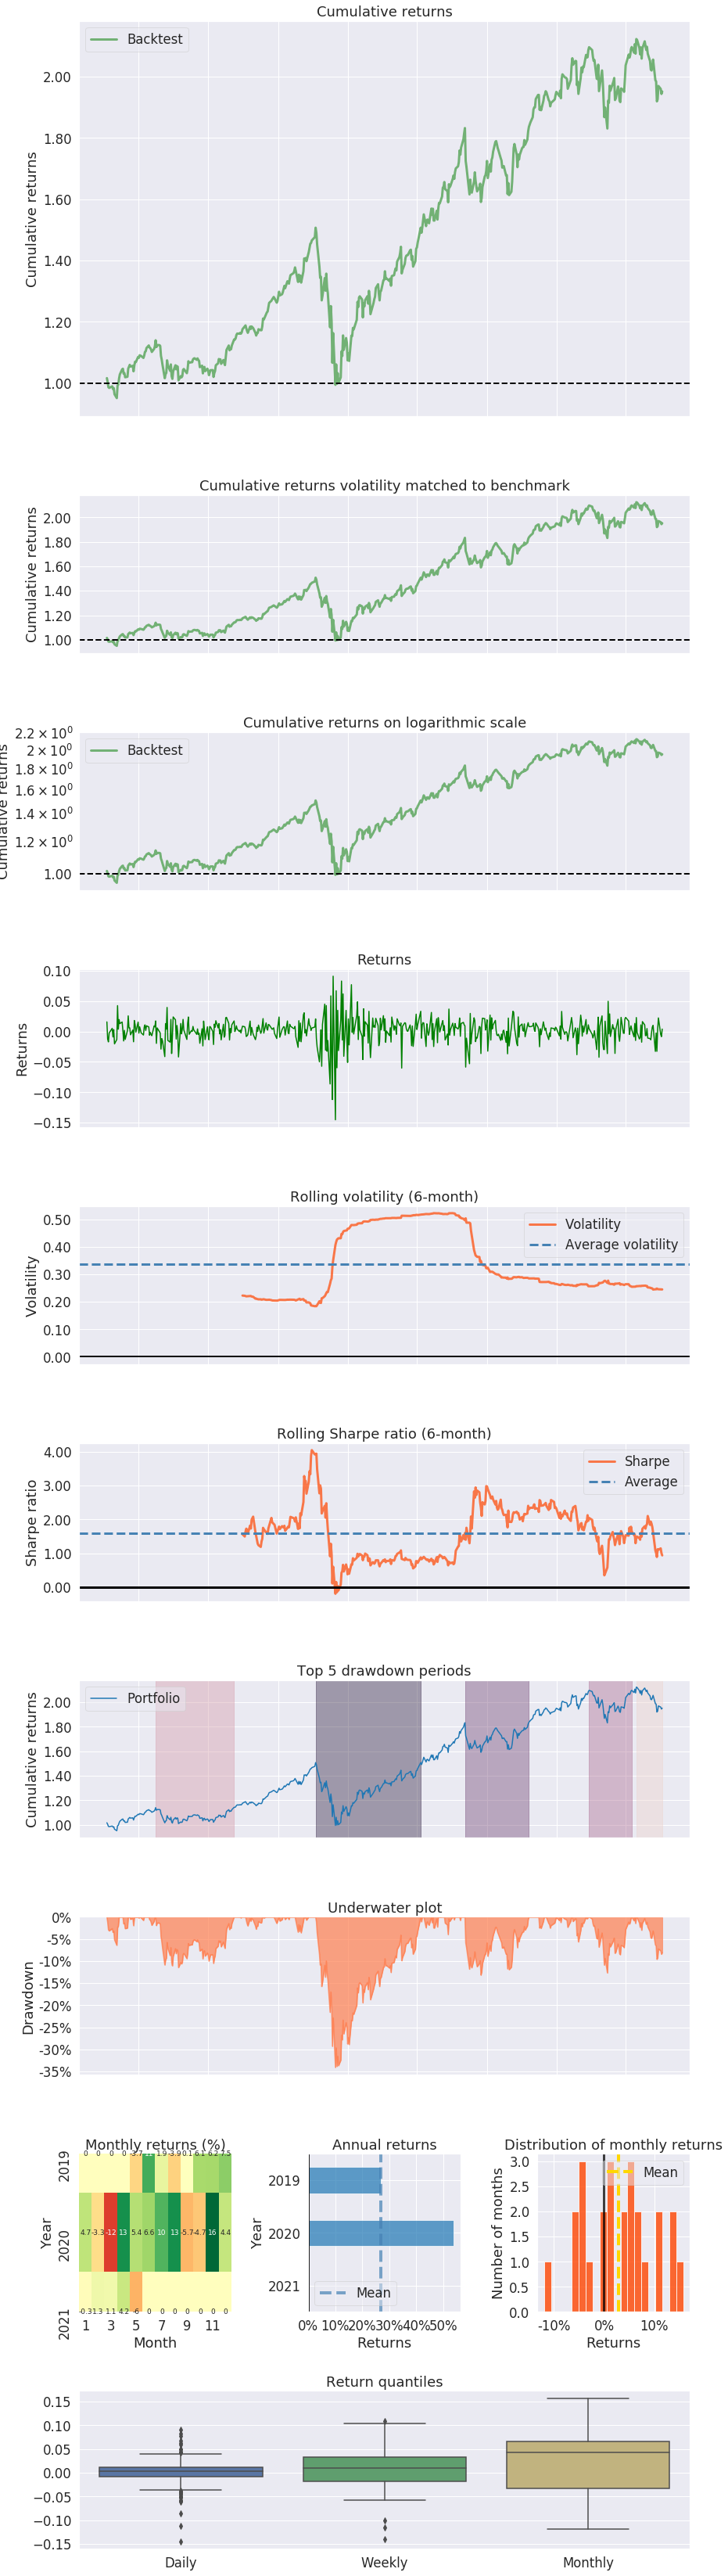

In [14]:
import pyfolio as pf
print("Weighted returns PCA")
pf.create_returns_tear_sheet(test_tech.dot(pcw_tech))

non-weighted returns


Start date,2019-05-21
End date,2021-05-19
Total months,24
,Backtest
Annual return,31.35%
Cumulative returns,72.527%
Annual volatility,30.513%
Sharpe ratio,1.05
Calmar ratio,0.97
Stability,0.89
Max drawdown,-32.197%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,32.20,2020-02-19,2020-03-20,2020-07-20,109
1,11.93,2020-09-02,2020-09-23,2020-11-25,61
2,10.02,2019-07-24,2019-08-23,2019-11-04,74
3,9.46,2021-02-12,2021-03-08,2021-04-05,37
4,7.67,2021-04-16,2021-05-12,NaT,NaN


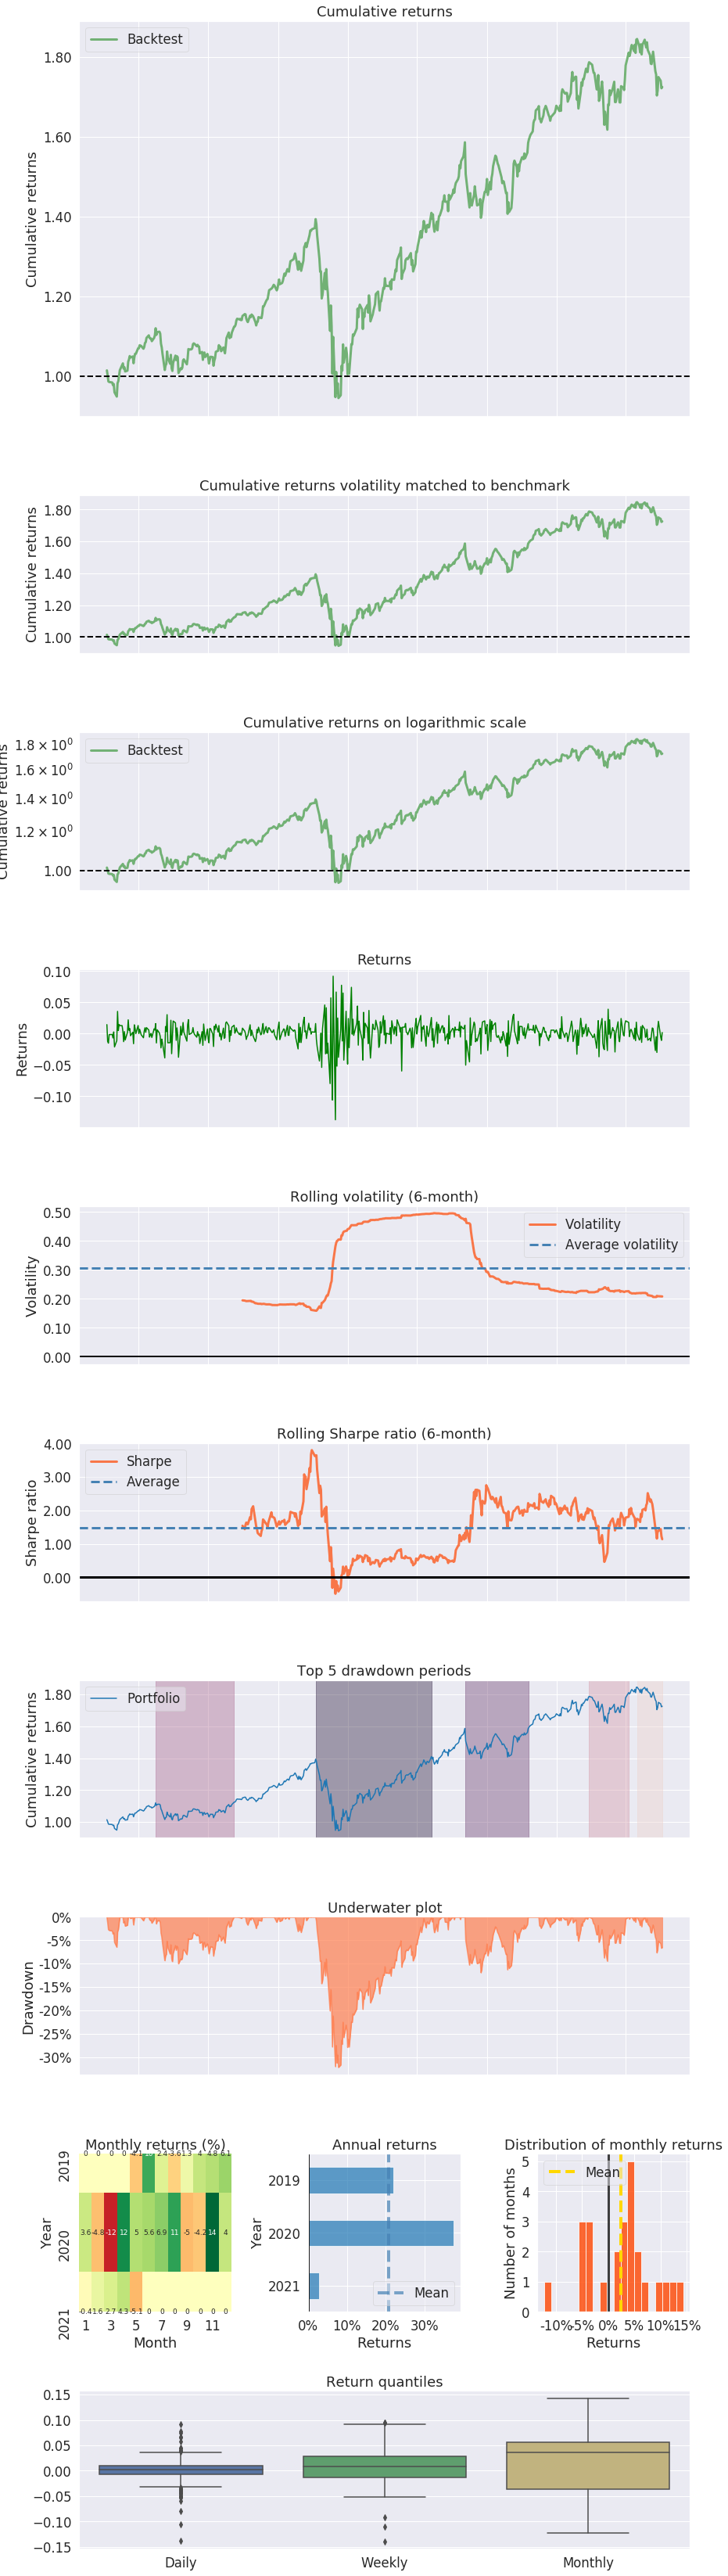

In [15]:
print("non-weighted returns")
pf.create_returns_tear_sheet(test_tech.transpose().mean())

## Top 10

In [16]:
dominant_assets = pc1_tech.sort_values().index[-10:]
dominant_assets = " ".join(dominant_assets)
dominant_assets

'HPQ XLNX TXN ADBE AMZN AMAT TSLA NVDA NFLX AMD'

In [17]:
test = yf.download(dominant_assets, start="2019-05-19", end="2021-05-20")
returns_test = test["Adj Close"].apply(np.log).diff(1)
returns_test = returns_test.stack()
returns_test.index = returns_test.index.set_names(['date', 'asset'])
returns_test = returns_test.unstack()
returns_test = returns_test.stack()
returns_test

[*********************100%***********************]  10 of 10 completed


date        asset
2019-05-21  ADBE     0.009467
            AMAT     0.022545
            AMD      0.024802
            AMZN    -0.000780
            HPQ      0.025001
                       ...   
2021-05-19  NFLX     0.002916
            NVDA     0.003561
            TSLA    -0.025253
            TXN      0.015808
            XLNX     0.024732
Length: 5040, dtype: float64

In [18]:
test["Adj Close"].apply(np.log).diff(1).mean(1).dropna()

Date
2019-05-21    0.018551
2019-05-22   -0.008684
2019-05-23   -0.017607
2019-05-24   -0.001088
2019-05-28    0.004894
                ...   
2021-05-13    0.000226
2021-05-14    0.026070
2021-05-17   -0.004778
2021-05-18   -0.008268
2021-05-19    0.005248
Length: 504, dtype: float64

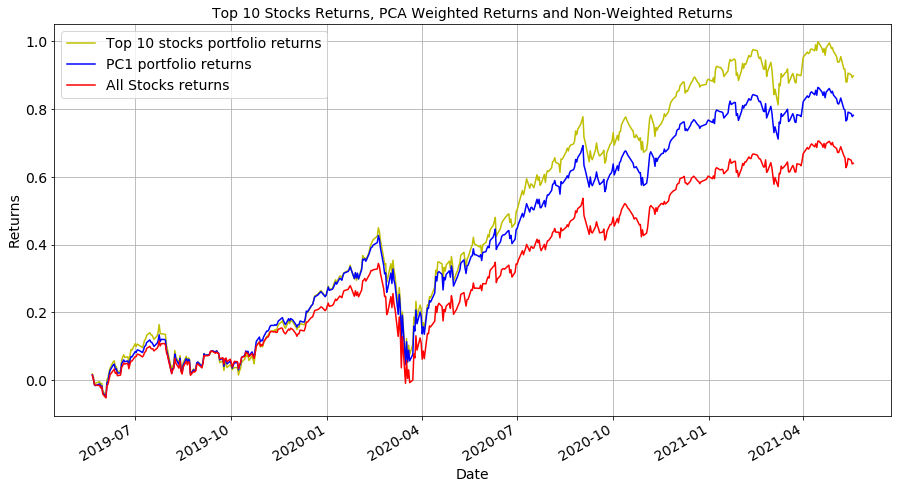

In [19]:
fig, ax = plt.subplots(1, figsize=(15, 8)) 
test["Adj Close"].apply(np.log).diff(1).mean(1).dropna().cumsum().plot(ax=ax, style='y-')
test_tech.dot(abs(pc1_tech)/sum(abs(pc1_tech))).cumsum().plot(ax=ax, style='b-',fontsize=14)
tech_nw.cumsum().plot(ax=ax, style='r-',fontsize=14)
ax.set_title("Top 10 Stocks Returns, PCA Weighted Returns and Non-Weighted Returns",fontsize=14)
ax.legend(['Top 10 stocks portfolio returns','PC1 portfolio returns','All Stocks returns'],fontsize=14)
ax.set_ylabel('Returns', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.grid()

In [20]:
mean_returns = []
for i in range(0,len(returns_test),10):
    mean_returns.append(returns_test[i:i+10].mean())
mean_returns

[0.018551439581233,
 -0.008683912612543842,
 -0.01760672835524728,
 -0.00108820480002918,
 0.004894352089185583,
 -0.008921979851113449,
 0.003813257709113449,
 -0.0218576310179865,
 -0.014282221570605635,
 0.04823958534544941,
 0.003189289360426795,
 0.019456714711183754,
 0.010208370591345961,
 0.019012739347860207,
 0.002493341750985678,
 -0.019932629568767624,
 0.002951166805426242,
 -0.014886748649651338,
 0.0022410096198895333,
 0.03052245738249413,
 0.00965877287589767,
 0.007125588259422777,
 -0.0077959527568862265,
 0.001932239555745774,
 -0.017466034255903252,
 0.021303590110681593,
 0.01772209009941932,
 -0.0015747919332572025,
 0.01855403577130077,
 -0.008310456274174437,
 0.007347997820997376,
 -0.003972078113005572,
 -0.006503907720816038,
 0.009196426528420076,
 0.012433583342199305,
 0.0038024385164927565,
 0.01083509321042495,
 0.007602524722309534,
 -0.005951326929096723,
 -0.0005623105873908685,
 -0.005521073004128674,
 -0.007532301475819692,
 0.010128012209549642,
 

In [21]:
df = pd.Series(mean_returns,index=sorted(list(set(returns_test.index.get_level_values('date')))))

PCA top 10 assets


Start date,2019-05-21
End date,2021-05-19
Total months,24
,Backtest
Annual return,46.763%
Cumulative returns,115.393%
Annual volatility,35.829%
Sharpe ratio,1.25
Calmar ratio,1.32
Stability,0.92
Max drawdown,-35.424%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,35.42,2020-02-19,2020-03-18,2020-07-06,99
1,15.51,2021-02-12,2021-03-08,2021-04-13,43
2,14.53,2019-07-24,2019-10-08,2019-11-19,85
3,13.35,2020-09-02,2020-09-23,2020-11-23,59
4,11.44,2021-04-15,2021-05-12,NaT,NaN


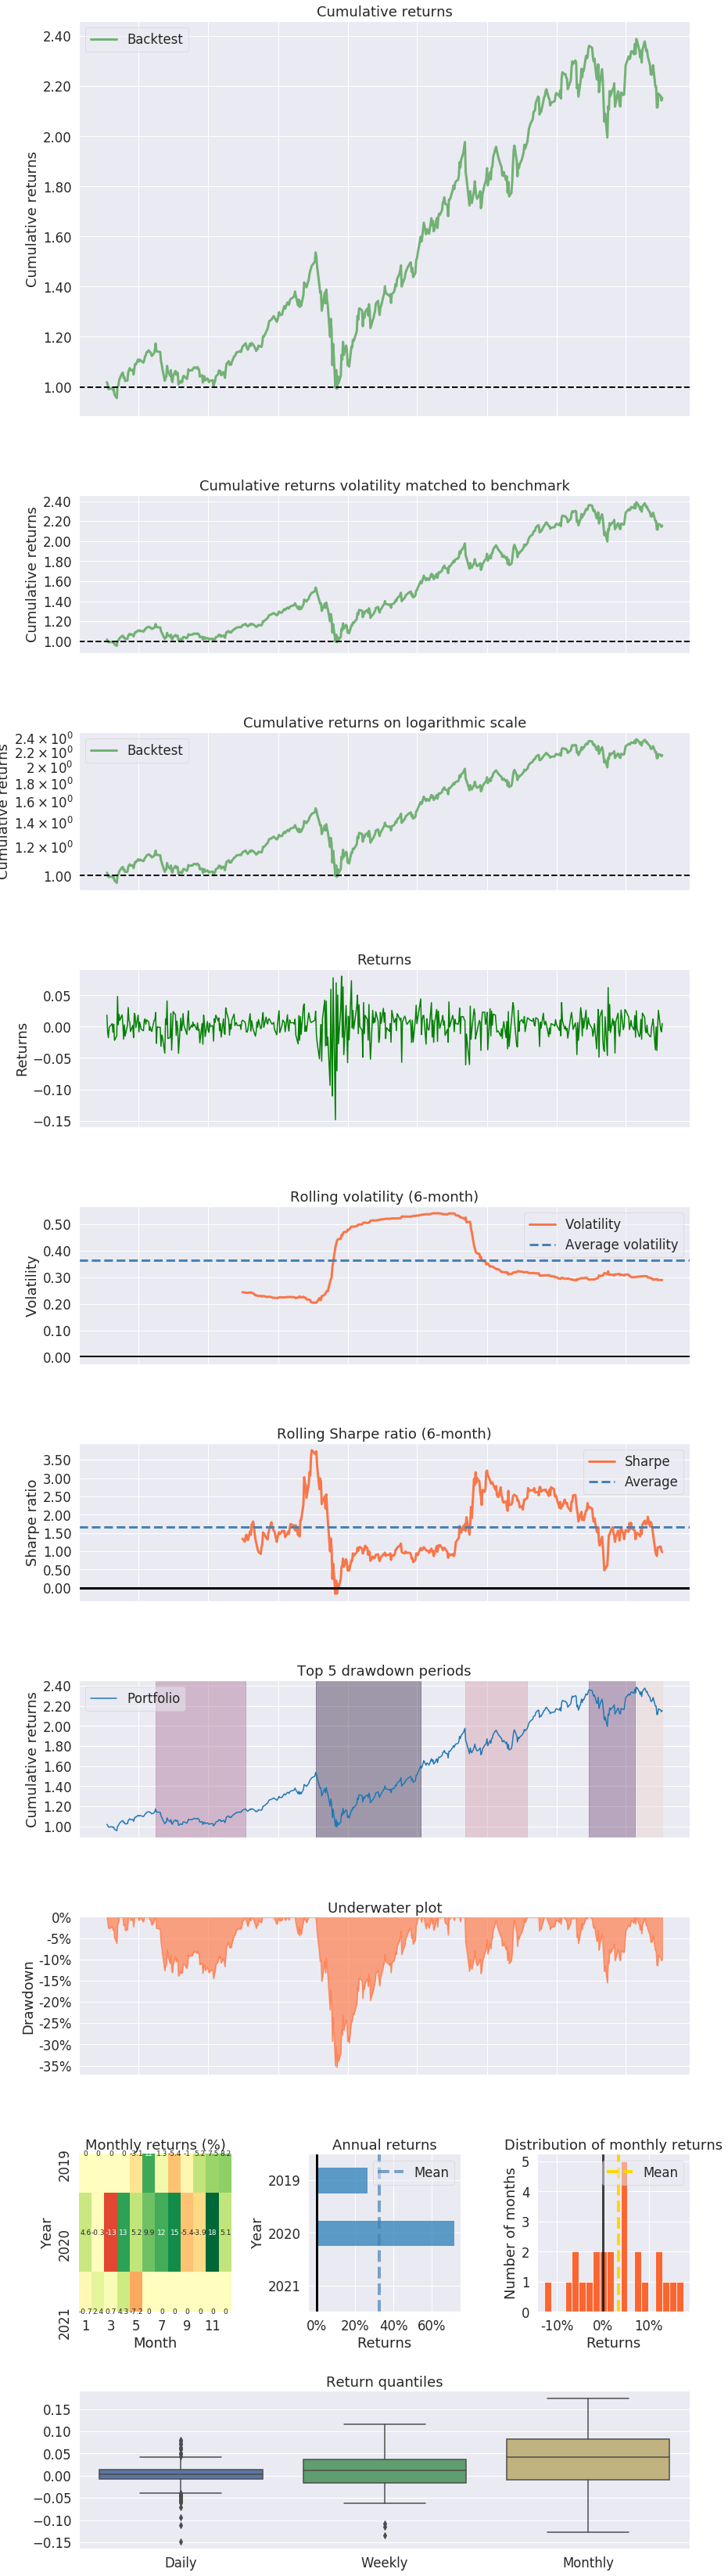

In [22]:
import pyfolio as pf
print("PCA top 10 assets")
pf.create_returns_tear_sheet(df)